In [1]:
import pandas as pd
import numpy as np
import altair as alt

### Save plot data as json (don't embed)

In [2]:
alt.data_transformers.enable("json")

DataTransformerRegistry.enable('json')

### Load data and take a look

In [3]:
reviews = pd.read_pickle("reviews.pkl")
reviews.head()

,Name,Producer,Year,Type,Points,ABV,Price,Value,Region,Country,Grape,ReviewerID
ID,,,,,,,,,,,,
4,muskateller,"melcher, schloss gamlitz",1976.0,White,96.0,NaN,NaN,0 - Unknown,Südsteiermark,Austria,Muskateller,201
13,schieferterrassen,heymann-löwenstein,2003.0,White,91.0,12.5,9.8,0 - Unknown,Mosel-Saar-Ruwer,Germany,Riesling,136
32,grüner veltliner kremser gebling,josef schmid,2003.0,White,84.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Grüner Veltliner,132
33,grüner veltliner reserve,josef schmid,2003.0,White,84.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Grüner Veltliner,132
34,riesling stratzinger sunogeln,josef schmid,2002.0,White,81.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Riesling,132


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49009 entries, 4 to 60514
Data columns (total 12 columns):
Name          49009 non-null object
Producer      49001 non-null category
Year          48098 non-null float64
Type          49009 non-null category
Points        42041 non-null float64
ABV           31516 non-null float64
Price         28226 non-null float64
Value         48995 non-null category
Region        48950 non-null category
Country       48950 non-null category
Grape         47623 non-null category
ReviewerID    49009 non-null int16
dtypes: category(6), float64(4), int16(1), object(1)
memory usage: 3.5+ MB


### Pandas DataFrame Basics

#### Select rows

In [5]:
reviews[:10]

,Name,Producer,Year,Type,Points,ABV,Price,Value,Region,Country,Grape,ReviewerID
ID,,,,,,,,,,,,
4,muskateller,"melcher, schloss gamlitz",1976.0,White,96.0,NaN,NaN,0 - Unknown,Südsteiermark,Austria,Muskateller,201
13,schieferterrassen,heymann-löwenstein,2003.0,White,91.0,12.5,9.8,0 - Unknown,Mosel-Saar-Ruwer,Germany,Riesling,136
32,grüner veltliner kremser gebling,josef schmid,2003.0,White,84.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Grüner Veltliner,132
33,grüner veltliner reserve,josef schmid,2003.0,White,84.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Grüner Veltliner,132
34,riesling stratzinger sunogeln,josef schmid,2002.0,White,81.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Riesling,132
35,riesling stratzinger sunogeln,josef schmid,2003.0,White,84.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Riesling,132
37,grüner silvaner s,wittmann,2003.0,White,80.0,NaN,NaN,0 - Unknown,Rheinhessen,Germany,Silvaner,132
38,weissburgunder vom kiesel,klaus schneider,2003.0,White,85.0,NaN,NaN,0 - Unknown,Pfalz,Germany,Pinot blanc,132
39,weissburgunder kirrweiler mandelberg großes ge...,bergdolt,2003.0,White,88.0,14.5,NaN,0 - Unknown,Pfalz,Germany,Pinot blanc,132


#### Select column

In [6]:
reviews.Type

ID
4            White
13           White
32           White
33           White
34           White
35           White
37           White
38           White
39           White
42           White
43           White
44           White
45           White
46           White
47           White
48           White
51             Red
61             Red
77             Red
79             Red
80           Sweet
100            Red
101            Red
103            Red
105            Red
106          White
107          White
109          White
110          White
114          White
           ...    
60484          Red
60485        White
60486        White
60487        White
60488        White
60489        White
60490        White
60491          Red
60492        White
60493        White
60494          Red
60495          Red
60496        White
60497          Red
60498          Red
60499          Red
60500    Sparkling
60501        White
60502          Red
60503        White
60504          Red
60506    

#### Select multiple columns

In [7]:
reviews[["Country","Region"]].head()

,Country,Region
ID,,
4,Austria,Südsteiermark
13,Germany,Mosel-Saar-Ruwer
32,Austria,Kremstal
33,Austria,Kremstal
34,Austria,Kremstal


#### Tabulate values

In [8]:
reviews.Value.value_counts()

0 - Unknown       28431
2 - Acceptable     8016
3 - Good           7454
1 - Bad            3231
4 - Excellent      1863
Name: Value, dtype: int64

In [9]:
pd.crosstab(reviews.Type, reviews.ABV)  # cross-tabulate multiple columns

ABV,0.0,1.0,2.0,2.2,3.5,4.0,4.5,5.0,5.18,5.5,...,1300.0,1987.0,1999.0,2001.0,2002.0,2004.0,2005.0,2007.0,2009.0,2011.0
Type,,,,,,,,,,,,,,,,,,,,,
Red,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
White,2,0,0,0,0,1,3,4,0,2,...,0,1,1,1,1,1,1,1,1,1
Rosé,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
Sparkling,0,0,2,0,1,4,1,7,1,4,...,0,0,0,0,0,0,0,0,0,0
Sweet,0,0,1,1,0,2,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Fortified,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Subset data frame

Condition on value in one column

In [10]:
reviews[reviews.Value == "4 - Excellent"].head()

,Name,Producer,Year,Type,Points,ABV,Price,Value,Region,Country,Grape,ReviewerID
ID,,,,,,,,,,,,
164,"sausenheimer honigsack, spätlese trocken (18 02)","karl-heinz gaul, grünstadt-sausenheim",2001.0,White,91.0,13.0,6.2,4 - Excellent,Pfalz,Germany,Riesling,172
2871,"niederhäuser rosenberg, auslese (24 00)","mathern, niederhausen",1999.0,White,92.0,10.0,8.0,4 - Excellent,Nahe,Germany,Riesling,172
2909,"winkeler gutenberg, auslese feinherb (22 00)","august eser, oestrich-winkel",1999.0,White,94.0,12.5,9.5,4 - Excellent,Rheingau,Germany,Riesling,172
2914,"oestricher doosberg, spätlese (22 03)","august eser, oestrich-winkel (rüd)",2002.0,White,91.0,10.0,6.8,4 - Excellent,Rheingau,Germany,Riesling,172
4560,kröver letterlay riesling spätlese layen,martin müllen,2003.0,White,89.0,7.5,9.9,4 - Excellent,Mosel-Saar-Ruwer,Germany,Riesling,132


Condition on value in multiple columns (don't forget the brackets!)

In [11]:
reviews[(reviews.Value == "4 - Excellent") & (reviews.Grape == "Chardonnay")].sort_values("Price").head()

,Name,Producer,Year,Type,Points,ABV,Price,Value,Region,Country,Grape,ReviewerID
ID,,,,,,,,,,,,
20356,chardonnay - barrel selection,vina caliterra,1996.0,White,88.0,13.6,2.0,4 - Excellent,Casablanca,Chile,Chardonnay,23
11851,chardonnay classic,hermann fink,2005.0,White,NaN,13.5,3.0,4 - Excellent,Neusiedlersee-Hügelland,Austria,Chardonnay,73
27230,chardonnay spätlese trocken,sippel,2007.0,White,84.0,13.0,4.5,4 - Excellent,Pfalz,Germany,Chardonnay,198
11254,chardonnay trocken,wein- und sektmanufaktur battenfeld-spanier,2004.0,White,84.0,NaN,4.9,4 - Excellent,Rheinhessen,Germany,Chardonnay,132
17364,muscadet de sevres et maine sur lie,la touche,2004.0,White,84.0,NaN,5.5,4 - Excellent,Loire,France,Chardonnay,139


Only keep rows with no missing values

In [12]:
reviews.dropna().head()

,Name,Producer,Year,Type,Points,ABV,Price,Value,Region,Country,Grape,ReviewerID
ID,,,,,,,,,,,,
13,schieferterrassen,heymann-löwenstein,2003.0,White,91.0,12.5,9.8,0 - Unknown,Mosel-Saar-Ruwer,Germany,Riesling,136
114,"westhofener morstein, auslese (18 02)","seehof fauth, westhofen",2001.0,White,86.0,10.5,6.2,0 - Unknown,Rheinhessen,Germany,Scheurebe,172
121,"ürziger würzgarten, spätlese (1 03)","jos. christoffel jr., ürzig",2002.0,White,89.0,7.5,7.8,0 - Unknown,Mosel-Saar-Ruwer,Germany,Riesling,172
122,"pölicher held, spätlese (2 04)","berweiler-merges, leiwen",2003.0,White,84.0,8.0,5.2,0 - Unknown,Mosel-Saar-Ruwer,Germany,Riesling,172
124,"erdener treppchen, spätlese (10 04)","merkelbach, ürzig",2003.0,White,74.0,9.0,5.0,0 - Unknown,Mosel-Saar-Ruwer,Germany,Riesling,172


Only keep rows with no missing values in specified columns

In [13]:
reviews.dropna(subset=["Country", "Points"]).head()

,Name,Producer,Year,Type,Points,ABV,Price,Value,Region,Country,Grape,ReviewerID
ID,,,,,,,,,,,,
4,muskateller,"melcher, schloss gamlitz",1976.0,White,96.0,NaN,NaN,0 - Unknown,Südsteiermark,Austria,Muskateller,201
13,schieferterrassen,heymann-löwenstein,2003.0,White,91.0,12.5,9.8,0 - Unknown,Mosel-Saar-Ruwer,Germany,Riesling,136
32,grüner veltliner kremser gebling,josef schmid,2003.0,White,84.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Grüner Veltliner,132
33,grüner veltliner reserve,josef schmid,2003.0,White,84.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Grüner Veltliner,132
34,riesling stratzinger sunogeln,josef schmid,2002.0,White,81.0,NaN,NaN,0 - Unknown,Kremstal,Austria,Riesling,132


### Plotting with Altair

#### Barplot

What we should be getting

In [14]:
reviews.Value.value_counts()

0 - Unknown       28431
2 - Acceptable     8016
3 - Good           7454
1 - Bad            3231
4 - Excellent      1863
Name: Value, dtype: int64

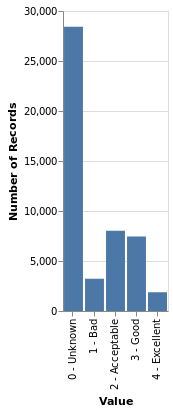

In [34]:
value_judgements = alt.Chart().mark_bar().encode(
    x = "Value:O",
    y = "count():Q")

value_judgements.properties(data=reviews.dropna(subset=["Value"]))

Change the size of the plot

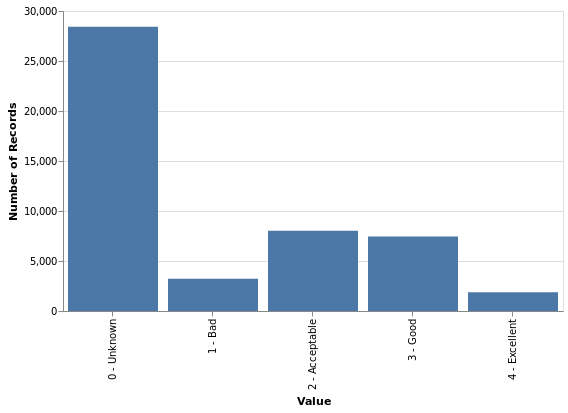

In [16]:
value_judgements.width = 500
value_judgements.properties(data=reviews.dropna(subset=["Value"]))

#### Scatterplot

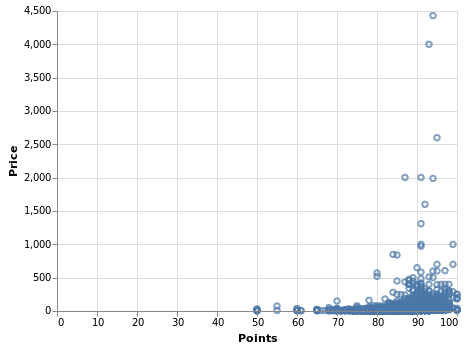

In [35]:
price_points = alt.Chart().mark_point().encode(
    x = "Points:Q",
    y = "Price:Q")

price_points.properties(data=reviews.dropna(subset=["Price","Points"]))

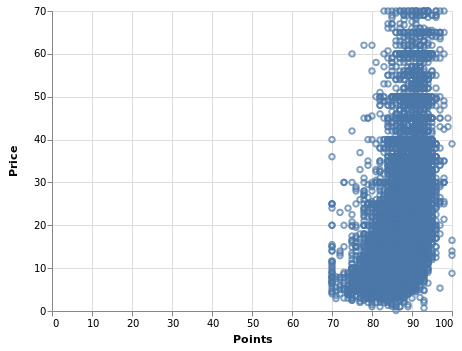

In [36]:
typical = reviews[reviews.Points >= 70]
typical = typical[typical.Price <= 70]

price_points.properties(data=typical)

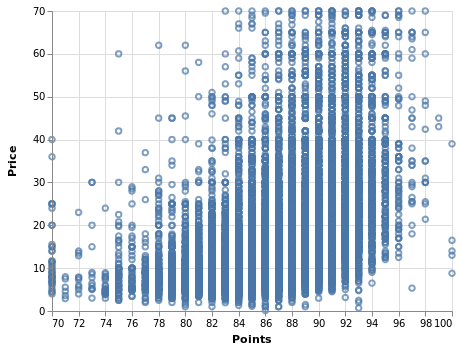

In [37]:
price_points = alt.Chart().mark_point().encode(
    x = alt.X("Points:Q", scale=alt.Scale(domain=[70,100])),
    y = "Price:Q")

price_points.properties(data=typical)

In [38]:
typical[["Price","Points"]].corr()

,Price,Points
Price,1.000000,0.470661
Points,0.470661,1.000000


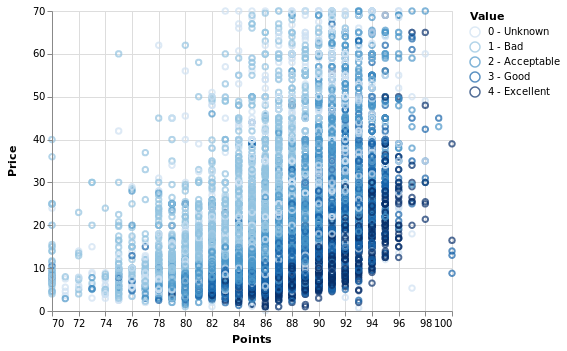

In [39]:
price_points_color = price_points.encode(color = "Value:O")

price_points_color.properties(data=typical)

#### Facetting

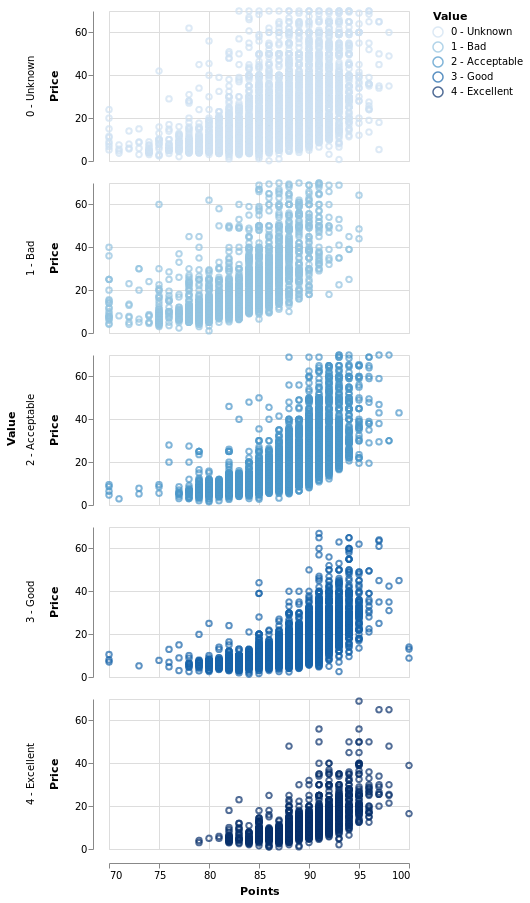

In [40]:
price_points_color.width = 300
price_points_color.height = 150

price_points_color.facet("Value:O").properties(data=typical)

Facet on rows and columns

In [26]:
from altair.expr import datum, floor

typical["code"] = typical.Value.cat.codes

price_counts = alt.Chart().mark_bar().encode(
    x = alt.X("Points:Q", scale=alt.Scale(domain=[70,100])),
    y = "count()",
    color = "Value:O"
    ).transform_calculate(rowcodes=floor(datum.code / 3)
    ).transform_calculate(columncodes=datum.code % 3)

price_counts.width = 250
price_counts.height = 200

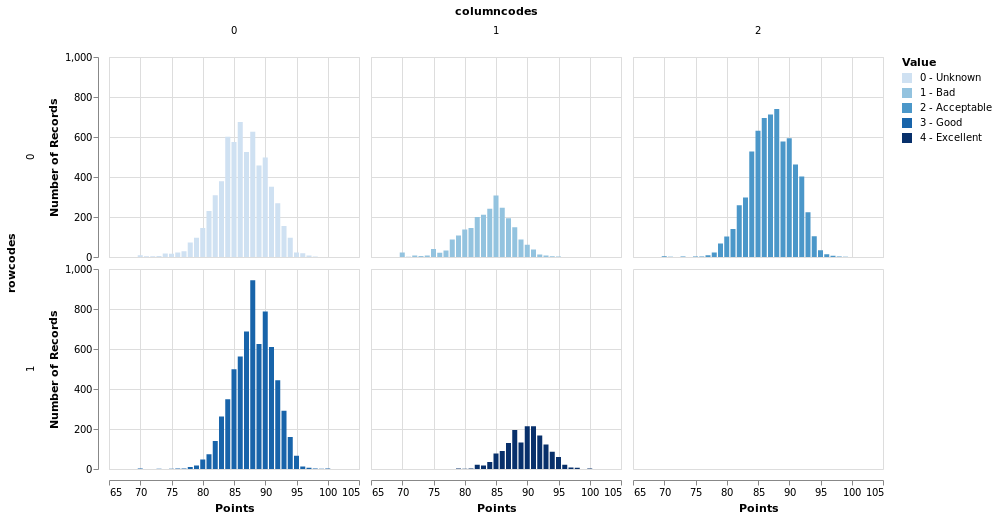

In [27]:
price_counts.facet(row="rowcodes:O", column="columncodes:O", data=typical)

#### Combining Charts

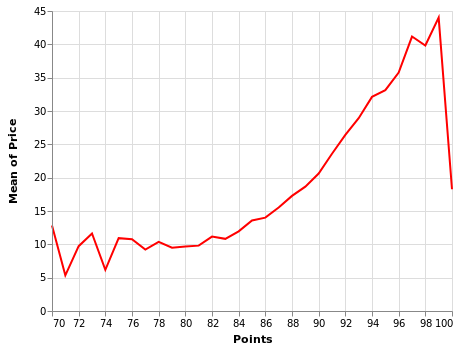

In [23]:
scatter = alt.Chart().mark_point().encode(
    x = alt.X("Points:Q", scale=alt.Scale(domain=[70,100])),
    y = "Price:Q",
    color = "Value:O")

line = alt.Chart().mark_line(color="red").encode(
    x = alt.X("Points:Q", scale=alt.Scale(domain=[70,100])),
    y = "mean(Price)")

line.properties(data=typical)

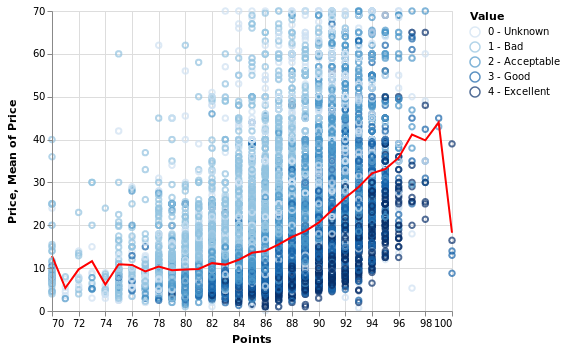

In [24]:
combined = scatter + line
combined.properties(data=typical)

Might as well facet that while we're at it

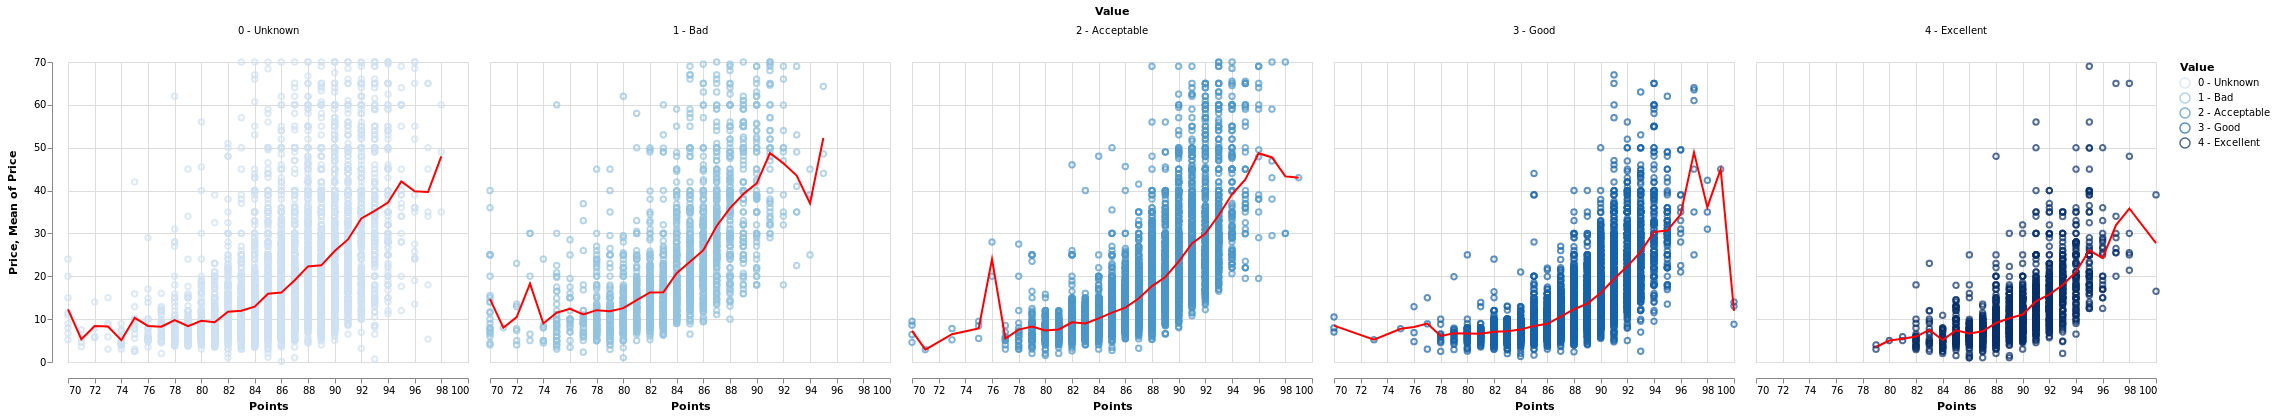

In [25]:
combined.facet(column="Value:O").properties(data=typical)

#### Interactive Plots

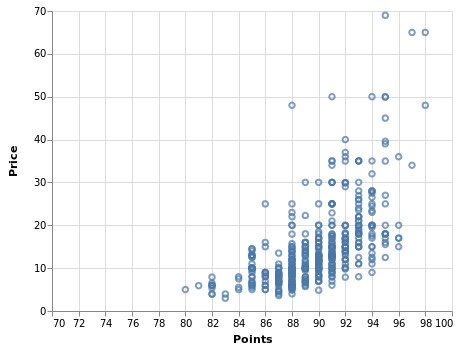

In [28]:
some_great_french_wines = typical[(typical.Value == "4 - Excellent") & (typical.Country == "France")]

price_points.encode(tooltip="Producer").properties(data=some_great_french_wines)

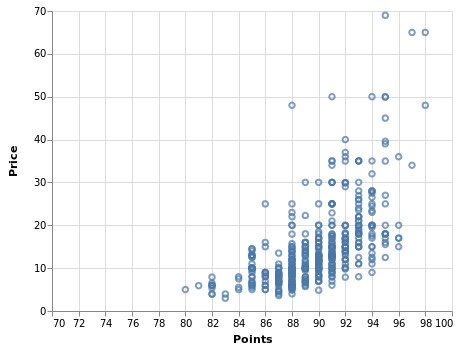

In [29]:
price_points.encode(tooltip="Producer").properties(data=some_great_french_wines).interactive()

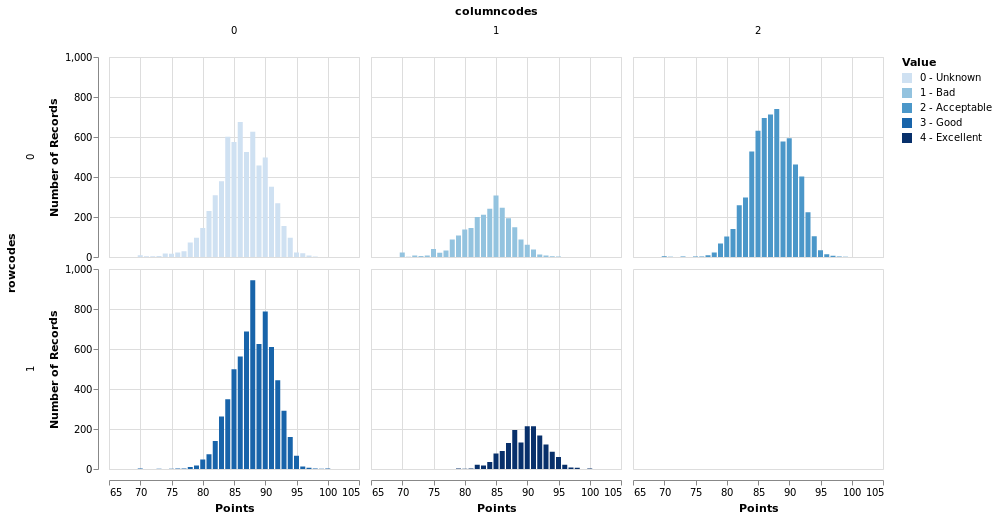

In [30]:
selector = alt.selection_multi(encodings=['x'])
price_counts_select = price_counts.encode(color = alt.condition(selector, 'Value:O', alt.value('lightgray'))
                   ).properties(selection=selector)

price_counts_select.facet(row="rowcodes:O", column="columncodes:O", data=typical)

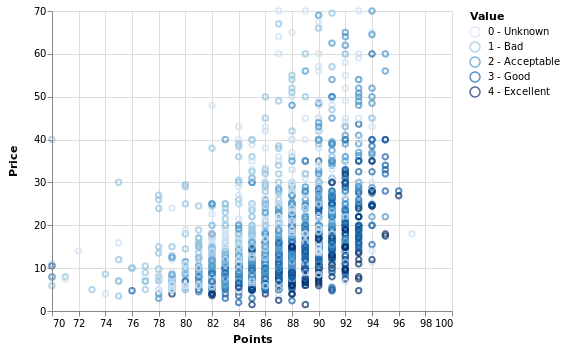

In [31]:
some_wines = typical.sample(2000)

brush = alt.selection_interval()
scatter_select = scatter.encode(color = alt.condition(brush, 'Value:O', alt.value('lightgray'))).properties(selection=brush)
scatter_select.properties(data=some_wines)

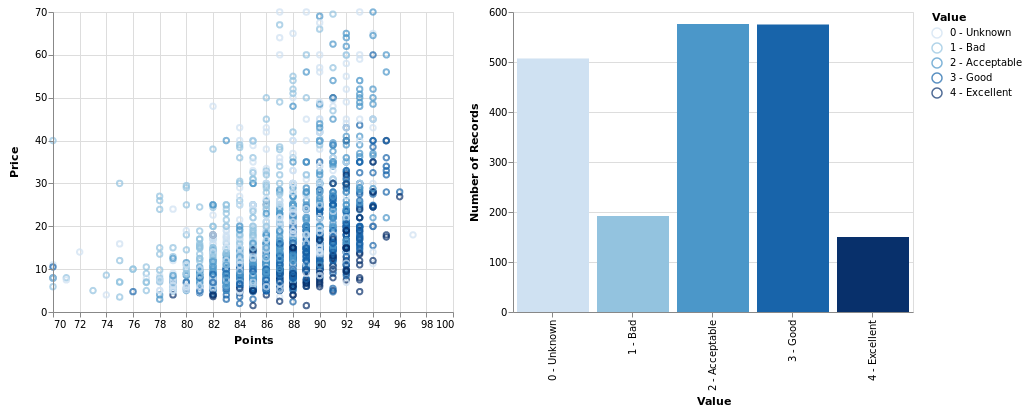

In [32]:
value_counts = alt.Chart().mark_bar().encode(
    x = "Value:O",
    y = "count()",
    color = "Value:O"
    ).transform_filter(brush.ref())

value_counts.width = 400

alt.hconcat(scatter_select, value_counts).properties(data=some_wines)